# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mno≈ºenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2√ó2 Array{Float64,2}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [3]:
# mno≈ºenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2√ó2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

2.9e-6

#### Wersja ulepszona

In [5]:
# Nale≈ºy pamiƒôtaƒá o "column-major" dostƒôpie do tablic - 
# pierwszy indeks zmienia siƒô szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2√ó2 Array{Int64,2}:
 1  2
 3  4

4-element Array{Int64,1}:
 1
 3
 2
 4

In [4]:
# poprawiona funkcja korzytajƒÖca z powy≈ºszego oraz z faktu, ≈ºe
# mo≈ºna zmieniaƒá kolejno≈õƒá operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.029936499

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mno≈ºenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2√ó2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

#### Por√≥wnanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

3.2845567

In [11]:
@elapsed better_multiplication(A, B)

2.8886817

In [12]:
@elapsed A*B

0.0314885

### Wielomiany i aproksymacja ≈õredniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przyk≈Çadowa funkcja, kt√≥rƒÖ bƒôdziemy aproksymowaƒá
myfun = exp

exp (generic function with 14 methods)

In [15]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzƒô punkty do aproksymacji (tutaj jako przyk≈Çad wyliczone warto≈õci funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490193 + 2905.5721994684577*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [16]:
typeof(fit_poly_3)

Polynomial{Float64,:x}

In [17]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534294

In [18]:
using Plots

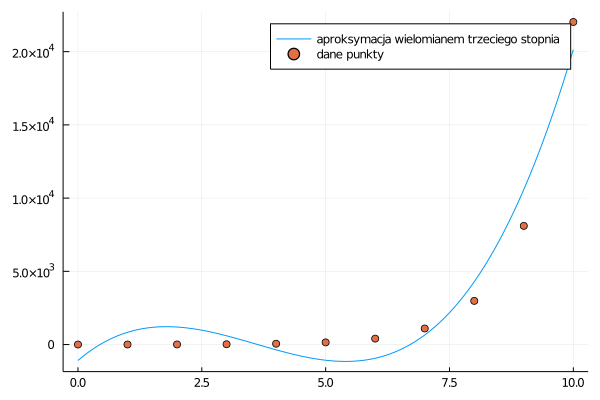

In [19]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punkt√≥w wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [20]:
# podajemy tablicƒô wsp√≥≈Çczynnik√≥w, gdzie wielomiany Czebyszewa sƒÖ wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1‚ãÖT_2(x))

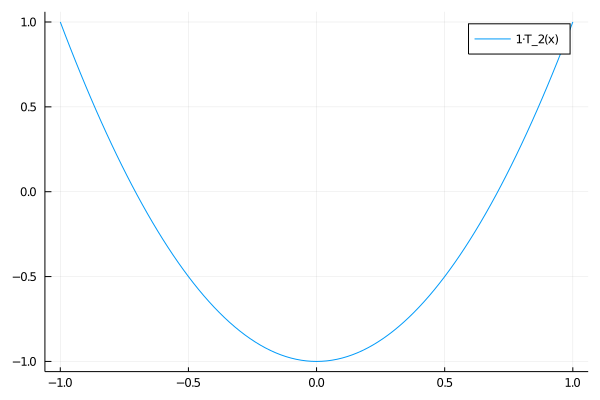

In [21]:
plot(t2)

In [22]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [23]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [24]:
# mo≈ºna tworzyƒá kombinacje liniowe w bazie wielomian√≥w Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3‚ãÖT_0(x) + 2‚ãÖT_1(x) + 1‚ãÖT_2(x))

In [25]:
convert(Polynomial, kombinacja_T)

Polynomial(2.0 + 2.0*x + 2.0*x^2)

SkƒÖd siƒô wzie≈Ço polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [26]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [27]:
using TaylorSeries

In [28]:
# Definiujemy, ile pierwszych wyraz√≥w szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + ùí™(t‚Å∂)

In [29]:
#Rozwiniƒôcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t¬≤ + 0.16666666666666666 t¬≥ + 0.041666666666666664 t‚Å¥ + 0.008333333333333333 t‚Åµ + ùí™(t‚Å∂)

In [30]:
# Julia hint - jak zapytaƒá o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [31]:
# mogƒô wyciƒÖgnƒÖƒá ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Array{Float64,1}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [32]:
# Z przybli≈ºenia Taylora tworzƒô wielomian zrozumia≈Çy dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [33]:
# mogƒô zamieniƒá przybli≈ºenie Taylora na aproksymacjƒô Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomiƒá 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mno≈ºenie BLAS w Julii (`A*B`) 

    dla coraz wiƒôkszych macierzy kwadratowych i zmierzyƒá czasy. Narysowaƒá wykres zale≈ºyno≈õci czasu od rozmiaru macierzy wraz z s≈Çupkami b≈Çƒôd√≥w, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny byƒá na jednym wykresie. (1pkt)
 
 
2. Napisaƒá w jƒôzyku C:
   - naiwnƒÖ metodƒô mno≈ºenia macierzy kwadratowych (wersja 1) 
   - ulepszonƒÖ wersjƒô za pomocƒÖ zamiany pƒôtli metodƒô mno≈ºenia macierzy(wersja 2), pamiƒôtajƒÖc, ≈ºe w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni≈º w Julii ! 
   - skorzystaƒá z  mo≈ºliwo≈õci BLAS poziom 3 dostƒôpnego w GSL  (przyk≈Çad uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Nale≈ºy por√≥wnywaƒá dzia≈Çanie tych trzech algorytmow bez w≈ÇƒÖczonej opcji optymalizacji kompilatora. Przedstawiƒá wyniki na jednym wykresie tak jak w p.1. (osobno ni≈º p.1).
    
    *(Dla chƒôtnych)* sprawdziƒá, co siƒô dzieje, jak w≈ÇƒÖczymy optymalizacjƒô kompilatora i dodaƒá do wykresu. (1 pkt)


3. U≈ºyƒá funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomian√≥w, kt√≥re najlepiej pasujƒÖ do zale≈ºno≈õci czasowych ka≈ºdego z algorytm√≥w. Stopie≈Ñ wielomianu powinien zgadzaƒá siƒô z teoretycznƒÖ z≈Ço≈ºonosciƒÖ. Dodaƒá wykresy uzyskanych wielomian√≥w do wcze≈õniejszych wykres√≥w. (1 pkt)

4. Pokazaƒá zniwelowanie efektu Rungego  poprzez u≈ºycie wsparcia dla wielomian√≥w Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

5. Przybli≈ºenie Pade jest czƒôsto lepsze ni≈º rozwiniƒôcie w szereg Taylora przy aproksymowaniu funkcji, kt√≥re posiadajƒÖ osobliwo≈õci. KorzystajƒÖc ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazaƒá dowolny przyk≈Çad (wraz z wykresem), gdzie takie przybli≈ºenie faktycznie jest lepsze. Mo≈ºna odtworzyƒá wykres z wyk≈Çadu albo zainspirowaƒá siƒô przyk≈Çadowym artyku≈Çem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)


In [1]:
using DataFrames
using Statistics
using Plots
using Polynomials
using TaylorSeries
using CSV

### Zadanie 1

1. Uruchomiƒá 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mno≈ºenie BLAS w Julii (`A*B`) 

    dla coraz wiƒôkszych macierzy kwadratowych i zmierzyƒá czasy. Narysowaƒá wykres zale≈ºyno≈õci czasu od rozmiaru macierzy wraz z s≈Çupkami b≈Çƒôd√≥w, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny byƒá na jednym wykresie. (1pkt)
 

In [5]:
df = DataFrame(method=String[], n=Int[], time=Float64[])

A = ones(1,1)
naive_multiplication(A,A)
better_multiplication(A,A)
A*A

for n in 10:10:400
    for i in 1:1:10 
        A = rand(n, n)
        push!(df, ("jl_naive", n, @elapsed(naive_multiplication(A, A))))
        push!(df, ("jl_better", n, @elapsed(better_multiplication(A,A))))
        push!(df, ("jl_blas", n, @elapsed(A*A)))
    end
end

In [6]:
method_grouped=groupby(df, [:method, :n])
df_stat = combine(method_grouped, "time" => mean, "time" => std)

120√ó4 DataFrame
 Row ‚îÇ method     n      time_mean   time_std    
     ‚îÇ String     Int64  Float64     Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ jl_naive      10  1.9598e-6   6.55409e-7
   2 ‚îÇ jl_better     10  2.4801e-6   8.57363e-7
   3 ‚îÇ jl_blas       10  1.1301e-6   1.85496e-6
   4 ‚îÇ jl_naive      20  1.83601e-5  9.42954e-6
   5 ‚îÇ jl_better     20  1.82002e-5  6.8657e-7
   6 ‚îÇ jl_blas       20  2.2697e-6   1.81717e-6
   7 ‚îÇ jl_naive      30  5.11199e-5  3.66427e-6
   8 ‚îÇ jl_better     30  5.26803e-5  1.31715e-6
   9 ‚îÇ jl_blas       30  4.9999e-6   5.59085e-6
  10 ‚îÇ jl_naive      40  0.00013145  2.32167e-6
  11 ‚îÇ jl_better     40  0.00013321  1.48521e-6
  ‚ãÆ  ‚îÇ     ‚ãÆ        ‚ãÆ        ‚ãÆ            ‚ãÆ
 111 ‚îÇ jl_blas      370  0.00142954  0.000182293
 112 ‚îÇ jl_naive     380  0.142091    0.00237854
 113 ‚îÇ jl_better    380  0.117969    0.00599304
 114 ‚îÇ jl_blas      380  0.00148449  0.000143597
 115 ‚îÇ jl_naive     390  0.159344    0.00635884
 116 ‚îÇ jl_better    390  0.126773    0.00750164
 117 ‚îÇ jl_blas      390  0.00179221  0.00029005
 118 ‚îÇ jl_naive     400  0.173629    0.00905449
 119 ‚îÇ jl_better    400  0.13772     0.0061299
 120 ‚îÇ jl_blas      400  0.00197617  0.000429913
                                  99 rows omitted

In [7]:
df_jl_naive= filter(row -> row.method == "jl_naive", df_stat)
df_jl_better= filter(row -> row.method == "jl_better", df_stat)
df_jl_blas= filter(row -> row.method == "jl_blas", df_stat)

40√ó4 DataFrame
 Row ‚îÇ method   n      time_mean   time_std    
     ‚îÇ String   Int64  Float64     Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ jl_blas     10  1.1301e-6   1.85496e-6
   2 ‚îÇ jl_blas     20  2.2697e-6   1.81717e-6
   3 ‚îÇ jl_blas     30  4.9999e-6   5.59085e-6
   4 ‚îÇ jl_blas     40  6.15e-6     1.96386e-6
   5 ‚îÇ jl_blas     50  1.48504e-5  5.05917e-6
   6 ‚îÇ jl_blas     60  4.33901e-5  9.00787e-6
   7 ‚îÇ jl_blas     70  0.00989762  0.0304804
   8 ‚îÇ jl_blas     80  0.00020608  3.35809e-5
   9 ‚îÇ jl_blas     90  0.00026316  7.38422e-5
  10 ‚îÇ jl_blas    100  0.0002582   2.76795e-5
  11 ‚îÇ jl_blas    110  0.00025735  3.25105e-5
  ‚ãÆ  ‚îÇ    ‚ãÆ       ‚ãÆ        ‚ãÆ            ‚ãÆ
  31 ‚îÇ jl_blas    310  0.00098797  0.000147319
  32 ‚îÇ jl_blas    320  0.00097392  0.000114996
  33 ‚îÇ jl_blas    330  0.00108433  6.80061e-5
  34 ‚îÇ jl_blas    340  0.00118772  0.000114375
  35 ‚îÇ jl_blas    350  0.00124712  0.000101382
  36 ‚îÇ jl_blas    360  0.00165275  0.000495571
  37 ‚îÇ jl_blas    370  0.00142954  0.000182293
  38 ‚îÇ jl_blas    380  0.00148449  0.000143597
  39 ‚îÇ jl_blas    390  0.00179221  0.00029005
  40 ‚îÇ jl_blas    400  0.00197617  0.000429913
                                19 rows omitted

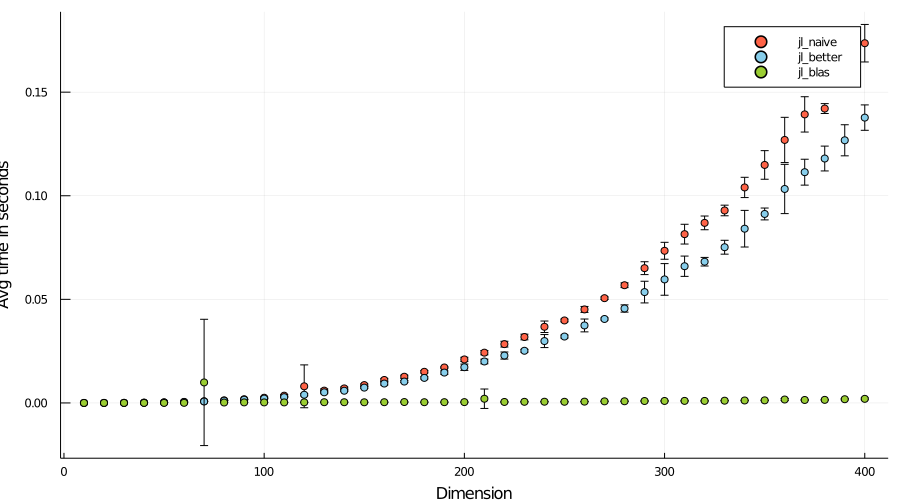

In [8]:
scatter([df_jl_naive.n], [df_jl_naive.time_mean],group=df_jl_naive.method, colour = [:tomato],
    yerr=df_jl_naive.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_jl_better.n], [df_jl_better.time_mean],group=df_jl_better.method, colour = [:skyblue],
    yerr=df_jl_better.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_jl_blas.n], [df_jl_blas.time_mean],group=df_jl_blas.method, colour = [:yellowgreen],
    yerr=df_jl_blas.time_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

### Zadanie 2

2. Napisaƒá w jƒôzyku C:
   - naiwnƒÖ metodƒô mno≈ºenia macierzy kwadratowych (wersja 1) 
   - ulepszonƒÖ wersjƒô za pomocƒÖ zamiany pƒôtli metodƒô mno≈ºenia macierzy(wersja 2), pamiƒôtajƒÖc, ≈ºe w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni≈º w Julii ! 
   - skorzystaƒá z  mo≈ºliwo≈õci BLAS poziom 3 dostƒôpnego w GSL  (przyk≈Çad uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Nale≈ºy por√≥wnywaƒá dzia≈Çanie tych trzech algorytmow bez w≈ÇƒÖczonej opcji optymalizacji kompilatora. Przedstawiƒá wyniki na jednym wykresie tak jak w p.1. (osobno ni≈º p.1).
    
    *(Dla chƒôtnych)* sprawdziƒá, co siƒô dzieje, jak w≈ÇƒÖczymy optymalizacjƒô kompilatora i dodaƒá do wykresu. (1 pkt)


#### Kod w C

```C
#include <stdio.h>
#include <time.h>
#include <sys/times.h>
#include <unistd.h>
#include <gsl/gsl_blas.h>
#include <stdlib.h>

long double gettime(clock_t t1, clock_t t2){
    return ((long double)(t2 - t1) / sysconf(_SC_CLK_TCK));
}


void naive_multiplication(int **matrixA, int **matrixB, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int));
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }
    for (int k = 0; k < n; k++){
        for (int j = 0; j < n; j++){  
            for (int i = 0; i < n; i++){  
                matrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    } 
}

void better_multiplication(int** matrixA, int** matrixB, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int));
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }
    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){  
            for (int k = 0; k < n; k++){
                matrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
}

void blas_multiplication(double* matrixA, double* matrixB, int n){
    double* matrix = malloc(sizeof(double) * n * n);
    gsl_matrix_view A = gsl_matrix_view_array(matrixA, n, n);
    gsl_matrix_view B = gsl_matrix_view_array(matrixB, n, n);
    gsl_matrix_view C = gsl_matrix_view_array(matrix, n, n);
    gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                    1.0, &A.matrix, &B.matrix,
                    0.0, &C.matrix);
}

int** create_random_matrix(int x, int y){
    int ** matrix = calloc(x, sizeof(int*));

    for (int i = 0; i < x; i ++){
        int * values = calloc(y, sizeof(int));
        matrix[i] = values;
        for (int j = 0; j < y; j ++){
            values[j] = rand() % 100;
        }
    }
    return matrix;
}

double* create_random_blas_matrix(int x, int y){
    double* matrix = (double *)malloc(x*y*sizeof(double));
    for (int i = 0; i < (x*y); i++) {
        matrix[i] = (double) (rand() % 100);
    }
    return matrix;
}

int main(){
    srand(time(NULL));
    struct tms start_tms;
    struct tms end_tms;
    clock_t clock_start;
    clock_t clock_end;

    FILE *f = fopen("results.csv", "w+");

    for (int n = 10; n <= 400; n += 10){
        for (int i = 0; i < 10; i++){
            int ** matrixA = create_random_matrix(n, n);
            int ** matrixB = create_random_matrix(n, n);
            double *blasMatrixA = create_random_blas_matrix(n,n);
            double *blasMatrixB = create_random_blas_matrix(n,n);

            fprintf(f, "%i,%i,", n, i);

            clock_start = times(&start_tms);
            naive_multiplication(matrixA, matrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf,", gettime(clock_start, clock_end));

            clock_start = times(&start_tms);
            better_multiplication(matrixA, matrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf,", gettime(clock_start, clock_end));

            clock_start = times(&start_tms);
            blas_multiplication(blasMatrixA, blasMatrixB, n);
            clock_end = times(&end_tms);
            fprintf(f, "%Lf\n", gettime(clock_start, clock_end));
        }
    }
    
    fclose(f);
    return 0;
}
```

In [9]:
df_c = CSV.read("results.csv", DataFrame)
size_grouped=groupby(df_c, [:n])
df_c_naive = combine(size_grouped, "naive" => mean, "naive" => std)
df_c_better = combine(size_grouped, "better" => mean, "better" => std)
df_c_blas = combine(size_grouped, "blas" => mean, "blas" => std)

40√ó3 DataFrame
 Row ‚îÇ n      blas_mean  blas_std    
     ‚îÇ Int64  Float64    Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    10      0.0    0.0
   2 ‚îÇ    20      0.0    0.0
   3 ‚îÇ    30      0.0    0.0
   4 ‚îÇ    40      0.0    0.0
   5 ‚îÇ    50      0.0    0.0
   6 ‚îÇ    60      0.0    0.0
   7 ‚îÇ    70      0.001  0.00316228
   8 ‚îÇ    80      0.001  0.00316228
   9 ‚îÇ    90      0.001  0.00316228
  10 ‚îÇ   100      0.002  0.00421637
  11 ‚îÇ   110      0.0    0.0
  ‚ãÆ  ‚îÇ   ‚ãÆ        ‚ãÆ           ‚ãÆ
  31 ‚îÇ   310      0.014  0.00516398
  32 ‚îÇ   320      0.017  0.00483046
  33 ‚îÇ   330      0.017  0.00483046
  34 ‚îÇ   340      0.02   3.65712e-18
  35 ‚îÇ   350      0.022  0.00421637
  36 ‚îÇ   360      0.022  0.00421637
  37 ‚îÇ   370      0.027  0.00483046
  38 ‚îÇ   380      0.027  0.00483046
  39 ‚îÇ   390      0.031  0.00567646
  40 ‚îÇ   400      0.036  0.00516398
                      19 rows omitted

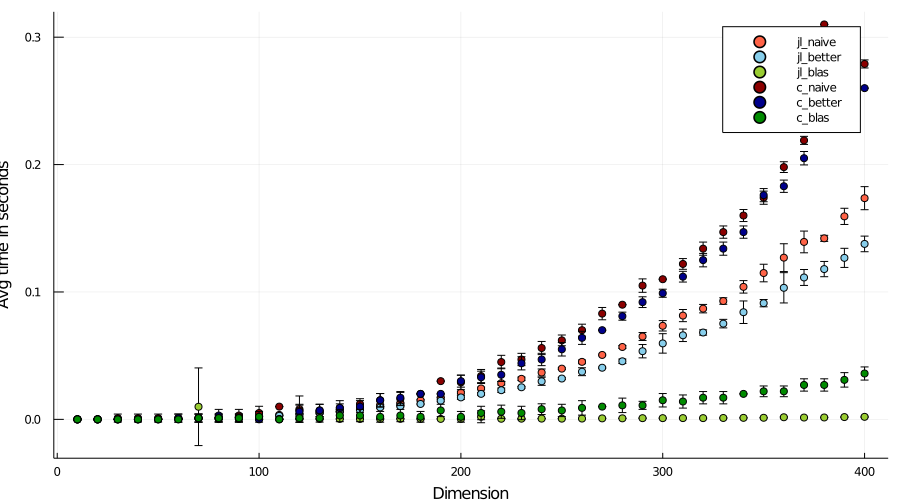

In [10]:
scatter!([df_c_naive.n], [df_c_naive.naive_mean], label = "c_naive", colour = [:red4],
    yerr=df_c_naive.naive_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_better.n], [df_c_better.better_mean], label = "c_better", colour = [:blue4],
    yerr=df_c_better.better_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_blas.n], [df_c_blas.blas_mean], label = "c_blas", colour = [:green4],
    yerr=df_c_blas.blas_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

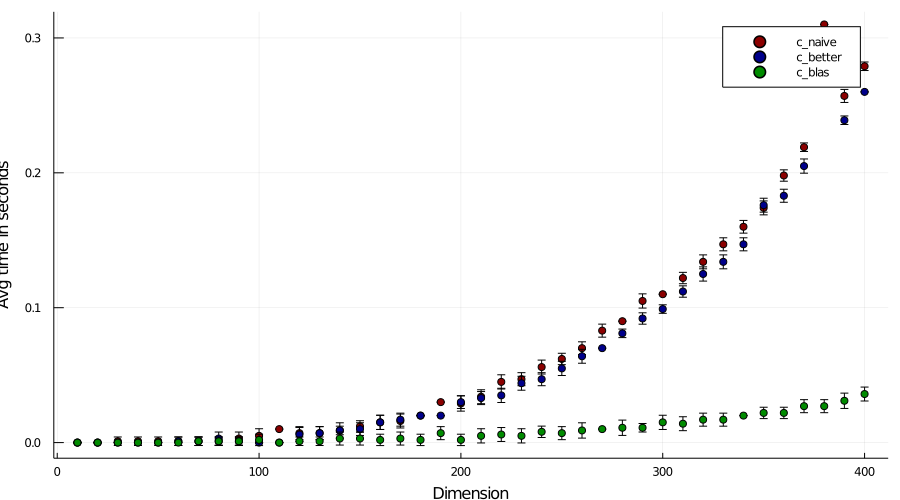

In [11]:
scatter([df_c_naive.n], [df_c_naive.naive_mean], label = "c_naive", colour = [:red4],
    yerr=df_c_naive.naive_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_better.n], [df_c_better.better_mean], label = "c_better", colour = [:blue4],
    yerr=df_c_better.better_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

scatter!([df_c_blas.n], [df_c_blas.blas_mean], label = "c_blas", colour = [:green4],
    yerr=df_c_blas.blas_std, xlabel = "Dimension", ylabel = "Avg time in seconds", size=(900, 500))

### Zadanie 3

3. U≈ºyƒá funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomian√≥w, kt√≥re najlepiej pasujƒÖ do zale≈ºno≈õci czasowych ka≈ºdego z algorytm√≥w. Stopie≈Ñ wielomianu powinien zgadzaƒá siƒô z teoretycznƒÖ z≈Ço≈ºonosciƒÖ. Dodaƒá wykresy uzyskanych wielomian√≥w do wcze≈õniejszych wykres√≥w. (1 pkt)

In [12]:
jl_naive_poly = fit(df_jl_naive.n, df_jl_naive.time_mean, 3)
jl_better_poly = fit(df_jl_better.n, df_jl_better.time_mean, 3)
jl_blas_poly = fit(df_jl_blas.n, df_jl_blas.time_mean, 3)

Polynomial(0.0003382749798665041 + 1.370977544186374e-5*x - 9.637863251534257e-8*x^2 + 1.8398509231264955e-10*x^3)

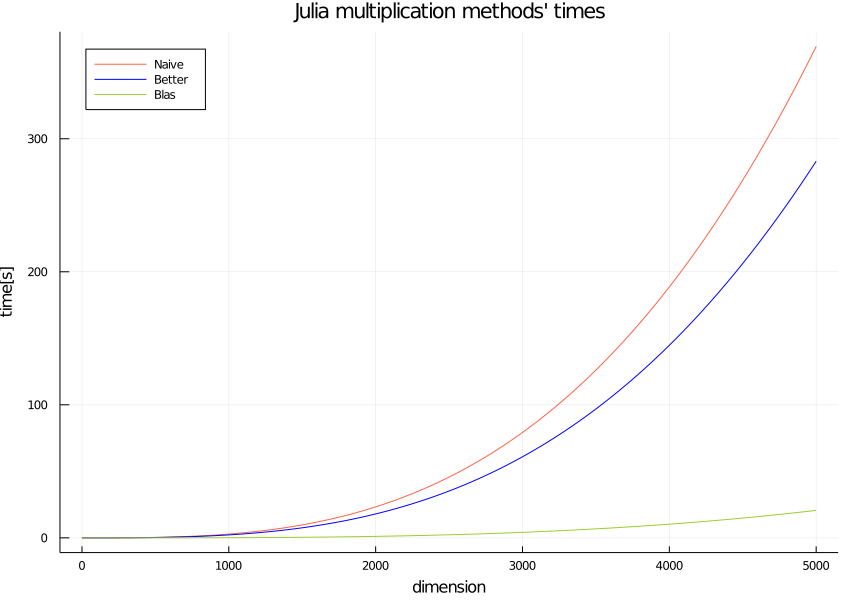

In [13]:
r = 0:10:5000;
jl_naive_poly_ys = [jl_naive_poly(x) for x in r]
jl_better_poly_ys = [jl_better_poly(x) for x in r]
jl_blas_poly_ys = [jl_blas_poly(x) for x in r]


scatter(title = "Julia multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600),legend = :topleft)
plot!(r, jl_naive_poly_ys, color=:tomato, label="Naive")
plot!(r, jl_better_poly_ys, color=:blue, label="Better")
plot!(r, jl_blas_poly_ys, color=:yellowgreen, label="Blas")

In [14]:
c_naive_poly = fit(df_c_naive.n, df_c_naive.naive_mean, 3)
c_better_poly = fit(df_c_better.n, df_c_better.better_mean, 3)
c_blas_poly = fit(df_c_blas.n, df_c_blas.blas_mean, 3)

Polynomial(-0.0008393259656417416 + 3.346974034946079e-5*x - 2.1849265251659457e-7*x^2 + 8.802259078403206e-10*x^3)

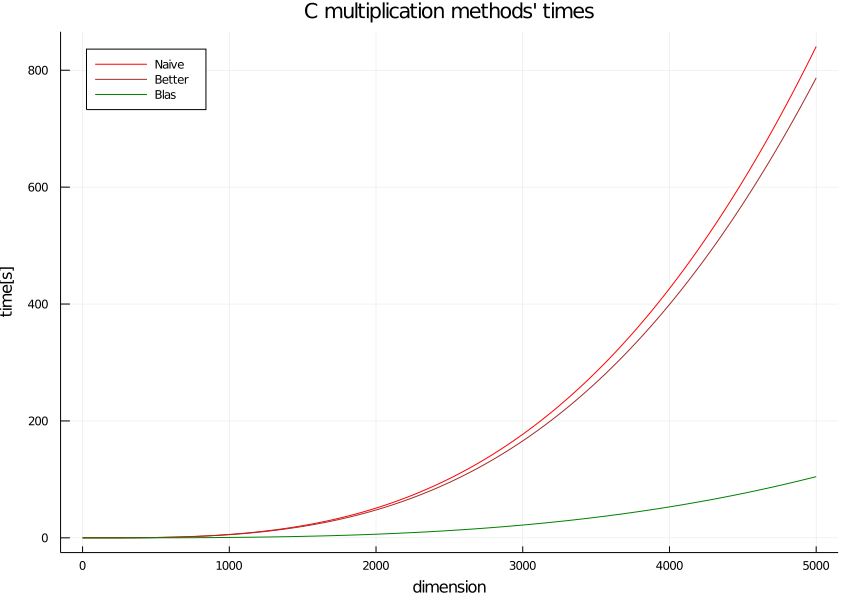

In [28]:
r = 0:10:5000;
c_naive_poly_ys = [c_naive_poly(x) for x in r]
c_better_poly_ys = [c_better_poly(x) for x in r]
c_blas_poly_ys = [c_blas_poly(x) for x in r]


scatter(title = "C multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600), legend = :topleft)
plot!(r, c_naive_poly_ys, color=:red, label="Naive")
plot!(r, c_better_poly_ys, color=:brown, label="Better")
plot!(r, c_blas_poly_ys, color=:green, label="Blas")

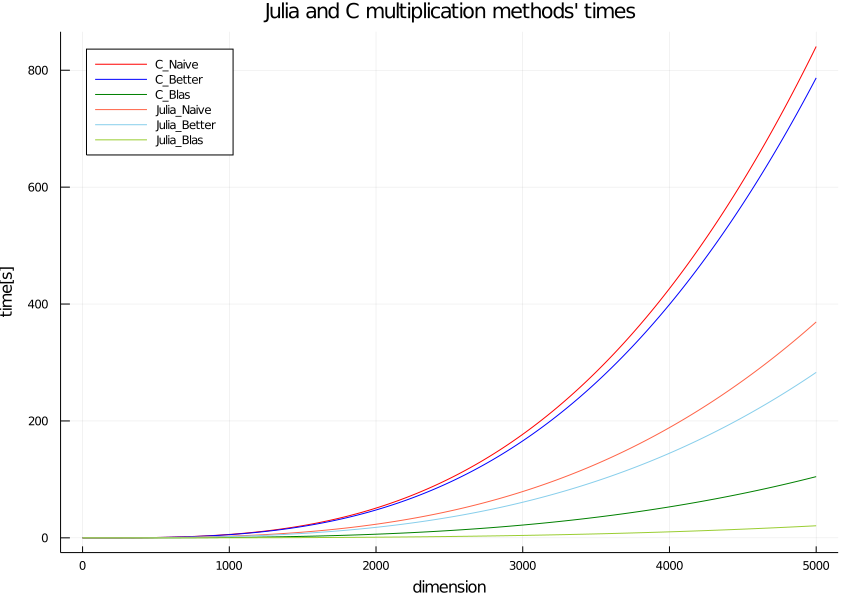

In [29]:
scatter(title = "Julia and C multiplication methods' times", xlabel = "dimension", ylabel = "time[s]",
        size = (850, 600), legend = :topleft)
plot!(r, c_naive_poly_ys, color=:red, label="C_Naive")
plot!(r, c_better_poly_ys, color=:blue, label="C_Better")
plot!(r, c_blas_poly_ys, color=:green, label="C_Blas")

plot!(r, jl_naive_poly_ys, color=:tomato, label="Julia_Naive")
plot!(r, jl_better_poly_ys, color=:skyblue, label="Julia_Better")
plot!(r, jl_blas_poly_ys, color=:yellowgreen, label="Julia_Blas")

### Zadanie 4

4. Pokazaƒá zniwelowanie efektu Rungego  poprzez u≈ºycie wsparcia dla wielomian√≥w Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

In [17]:
function f(x)
    return 1/(1+15x^2)
end

f (generic function with 1 method)

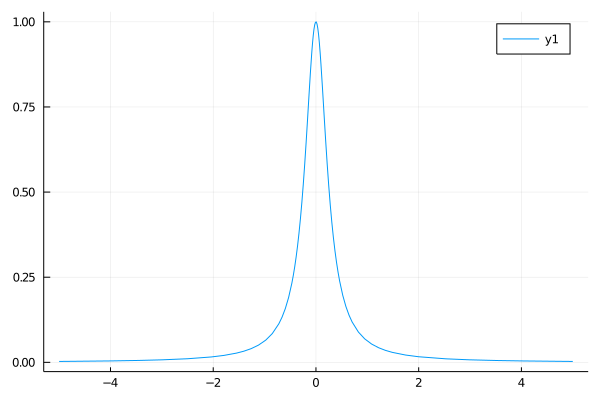

In [18]:
plot(f)

In [30]:
xs = -1:0.2:1 
ys = [f(x) for x in xs]
poly = fit(xs,ys)

Polynomial(1.0 + 5.551115123125783e-16*x - 12.155504300776911*x^2 + 5.329070518200751e-15*x^3 + 78.25167673938678*x^4 + 5.684341886080802e-14*x^5 - 229.93098353175276*x^6 + 291.50045142983475*x^8 + 2.842170943040401e-14*x^9 - 128.60314033669178*x^10)

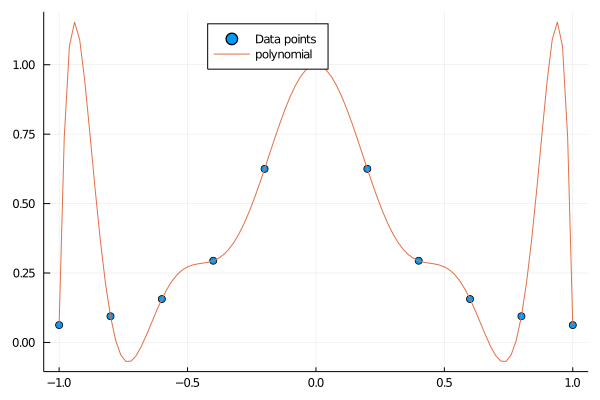

In [31]:
scatter(xs, ys, label = "Data points", legend=:top)
plot!(poly,  extrema(xs)..., label="polynomial")

In [32]:
cheb = ChebyshevT([0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0, 1])
roots = Polynomials.roots(cheb)
ys2 = [f(r) for r in roots]
poly2 = fit(roots, ys2)

Polynomial(1.0 + 2.6645352591003757e-15*x - 9.849152878283354*x^2 - 3.730349362740526e-14*x^3 + 44.72035073991738*x^4 + 1.4921397450962104e-13*x^5 - 93.9103834664951*x^6 - 1.9895196601282805e-13*x^7 + 90.03888883795959*x^8 + 1.0658141036401503e-13*x^9 - 31.96646940992649*x^10)

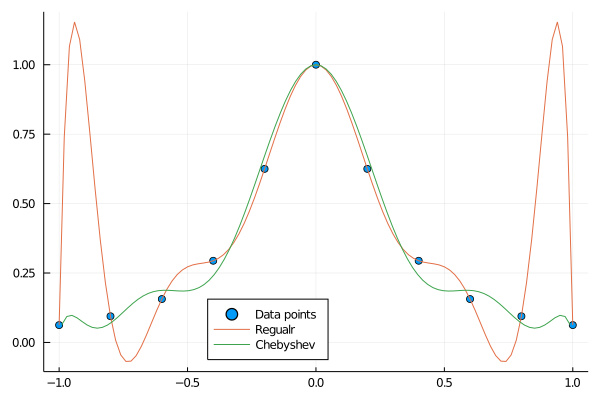

In [33]:
scatter(xs, ys, label = "Data points", legend=:bottom)

plot!(poly, extrema(xs)..., label="Regualr")
plot!(poly2, extrema(roots)..., label="Chebyshev")

### Zadanie 5

5. Przybli≈ºenie Pade jest czƒôsto lepsze ni≈º rozwiniƒôcie w szereg Taylora przy aproksymowaniu funkcji, kt√≥re posiadajƒÖ osobliwo≈õci. KorzystajƒÖc ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazaƒá dowolny przyk≈Çad (wraz z wykresem), gdzie takie przybli≈ºenie faktycznie jest lepsze. Mo≈ºna odtworzyƒá wykres z wyk≈Çadu albo zainspirowaƒá siƒô przyk≈Çadowym artyku≈Çem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)

In [22]:
function g(x)
    return sqrt((1 + x))/(1 + x)
end

g (generic function with 1 method)

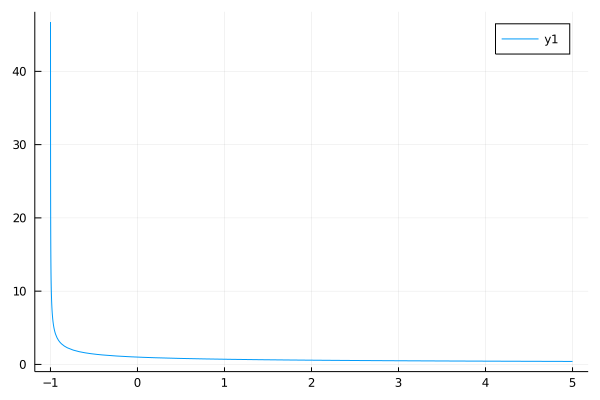

In [23]:
plot(g)

In [24]:
t = Taylor1(Float64, 5)
g_taylor = g(t)
g_poly = Polynomial(g_taylor.coeffs)

Polynomial(1.0 - 0.5*x + 0.375*x^2 - 0.3125*x^3 + 0.2734375*x^4 - 0.24609375*x^5)

In [25]:
plot(g, xaxis = ((-7,7), -10:0.5:10))
plot!(g_poly, label="Taylor")

In [26]:
pade_app = Polynomials.PolyCompat.PadeApproximation.Pade(Polynomial(g_taylor.coeffs), 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.7500000000000007*x + 0.06250000000000011*x^2), Polynomial(1.0 + 1.2500000000000009*x + 0.31250000000000044*x^2), :x)

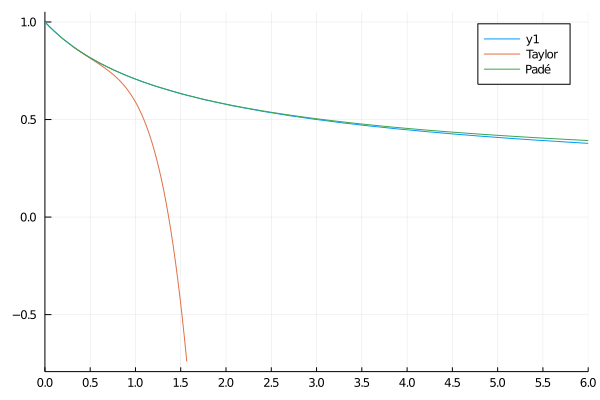

In [27]:
X2 = 0:0.1:6
Y2 = [pade_app(x) for x in X2]

plot(g, xaxis = ((0,6), -10:0.5:10))
plot!(g_poly, label="Taylor")
plot!(X2, Y2, label = "Pad√©")